<a href="https://colab.research.google.com/github/DevanshD3/BTC-Regression-/blob/main/CAV_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade quandl
import statsmodels.api as sm
import quandl
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
quandl.ApiConfig.api_key = "xxFb3yArSBpVMXUxmdks"
Ths = quandl.get("BCHAIN/HRATE", start_date="2015-01-01")
Ths
#the Total Hash Rate is in 

,Value
Date,
2015-01-01,3.353653e+05
2015-01-02,3.232437e+05
2015-01-03,3.313247e+05
2015-01-04,3.353653e+05
2015-01-05,3.394058e+05
...,...
2021-01-14,1.557088e+08
2021-01-15,1.505868e+08
2021-01-16,1.587820e+08


In [ ]:
Price = quandl.get("BCHAIN/MKPRU", start_date="2015-01-01", end_date="2020-12-31")

#the price is in USD

In [ ]:
df = {'Th/s': [] , 'Price': [] }
i = 0
while i < len(Price['Value']):
  
  df['Th/s'].append(float(Ths['Value'][i]/10000))
  df['Price'].append(float(Price['Value'][i]))
  i += 1


In [ ]:
df1 = pd.DataFrame(df, columns = ['Th/s', 'Price'])
df1



,Th/s,Price
0,33.536529,315.70
1,32.324365,316.15
2,33.132474,302.33
3,33.536529,270.93
4,33.940584,276.80
...,...,...
2187,12714.957849,24693.58
2188,13735.866873,26443.21
2189,14793.803400,26246.58
2190,14053.779939,27036.69


In [ ]:
y = df1["Price"]
X = df1["Th/s"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.761
Model:                            OLS   Adj. R-squared (uncentered):              0.761
Method:                 Least Squares   F-statistic:                              6975.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):                        0.00
Time:                        07:34:24   Log-Likelihood:                         -20952.
No. Observations:                2192   AIC:                                  4.191e+04
Df Residuals:                    2191   BIC:                                  4.191e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Th/s           1.0364      0.012     83.516      0.000       1.012       1.061
==============================================================================
Omnibus:                      711.695   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2755.527
Skew:                           1.555   Prob(JB):                         0.00
Kurtosis:                       7.527   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

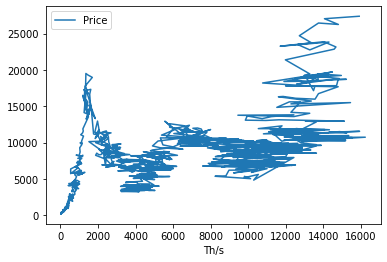

In [ ]:
# plt.figure(1, figsize=(10, 10))

# plt.subplot(211)
# plt.title('Price vs TH/s')
# plt.xlabel('Total hash rate')
# plt.ylabel('Price')
# plt.grid(True)
# plt.plot(y, df_Price['Price'], color='blue')
# plt.plot(X, df_Ths['Total Hash Rate']/10000, color='red')

lines = df1.plot.line(x='Th/s', y='Price')

In [ ]:
from google.colab import files

df1.to_csv('df1.csv')
files.download('df1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>